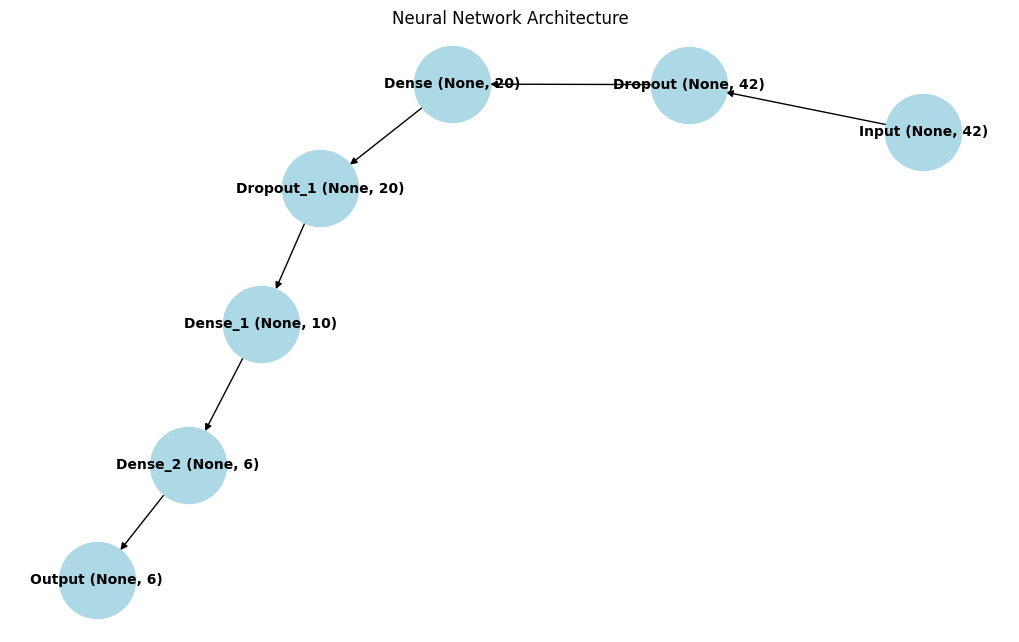

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define the layers
layers = ['Input (None, 42)', 'Dropout (None, 42)', 'Dense (None, 20)', 
          'Dropout_1 (None, 20)', 'Dense_1 (None, 10)', 'Dense_2 (None, 6)', 'Output (None, 6)']

# Add nodes for each layer
for layer in layers:
    G.add_node(layer)

# Connect nodes with directed edges (arrows)
edges = [('Input (None, 42)', 'Dropout (None, 42)'), 
         ('Dropout (None, 42)', 'Dense (None, 20)'), 
         ('Dense (None, 20)', 'Dropout_1 (None, 20)'),
         ('Dropout_1 (None, 20)', 'Dense_1 (None, 10)'),
         ('Dense_1 (None, 10)', 'Dense_2 (None, 6)'),
         ('Dense_2 (None, 6)', 'Output (None, 6)')]

G.add_edges_from(edges)

# Plot the graph
pos = nx.spring_layout(G)  # Layout to position nodes
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight='bold', arrows=True)
plt.title("Neural Network Architecture")
plt.show()

In [2]:
from graphviz import Source

dot_script = """
digraph NeuralNetwork {
    node [shape=box, style=filled, fillcolor=lightblue, fontname="Helvetica", fontsize=10];
    input [label="Input (None, 42)", shape=ellipse, fillcolor=lightgreen, width=1.5];
    dropout [label="Dropout (None, 42)\n0 params", shape=box, width=1.5];
    dense1 [label="Dense (None, 20)\n860 params", shape=box, width=1.5];
    dropout1 [label="Dropout_1 (None, 20)\n0 params", shape=box, width=1.5];
    dense2 [label="Dense_1 (None, 10)\n210 params", shape=box, width=1.5];
    dense3 [label="Dense_2 (None, 6)\n66 params", shape=box, width=1.5];
    output [label="Output (None, 6)", shape=ellipse, fillcolor=lightgreen, width=1.5];

    input -> dropout;
    dropout -> dense1;
    dense1 -> dropout1;
    dropout1 -> dense2;
    dense2 -> dense3;
    dense3 -> output;
}
"""
source = Source(dot_script)
source.render("nn_architecture", format="png", view=True)


'nn_architecture.png'

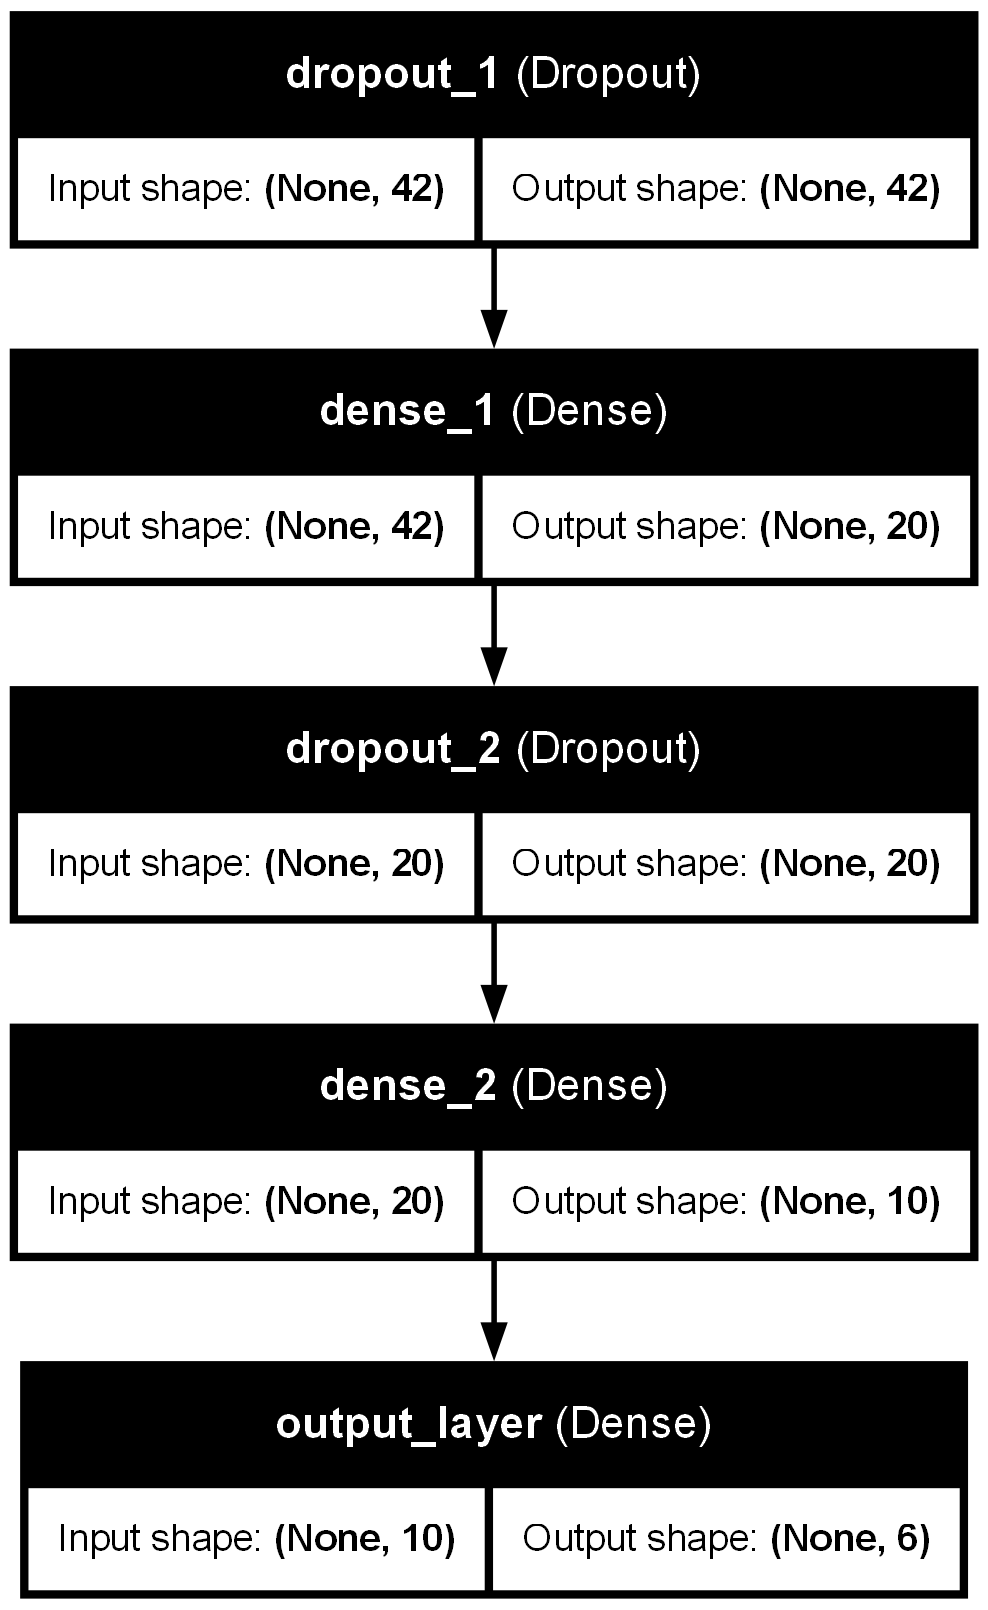

In [6]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Dense
from keras.utils import plot_model

# Create a simple Sequential model with custom layer names
model = Sequential([
    Input((21 * 2,), name="input_layer"),  # Input layer with shape (42,)
    Dropout(0.2, name="dropout_1"),        # Dropout Layer 1
    Dense(20, activation='relu', name="dense_1"),  # Dense Layer 1
    Dropout(0.4, name="dropout_2"),        # Dropout Layer 2
    Dense(10, activation='relu', name="dense_2"),  # Dense Layer 2
    Dense(6, activation='softmax', name="output_layer")  # Output Layer
])

# Generate a plot of the model and save it as 'modified_model_architecture.png'
plot_model(model, to_file='modified_model_architecture.png', show_shapes=True, show_layer_names=True)


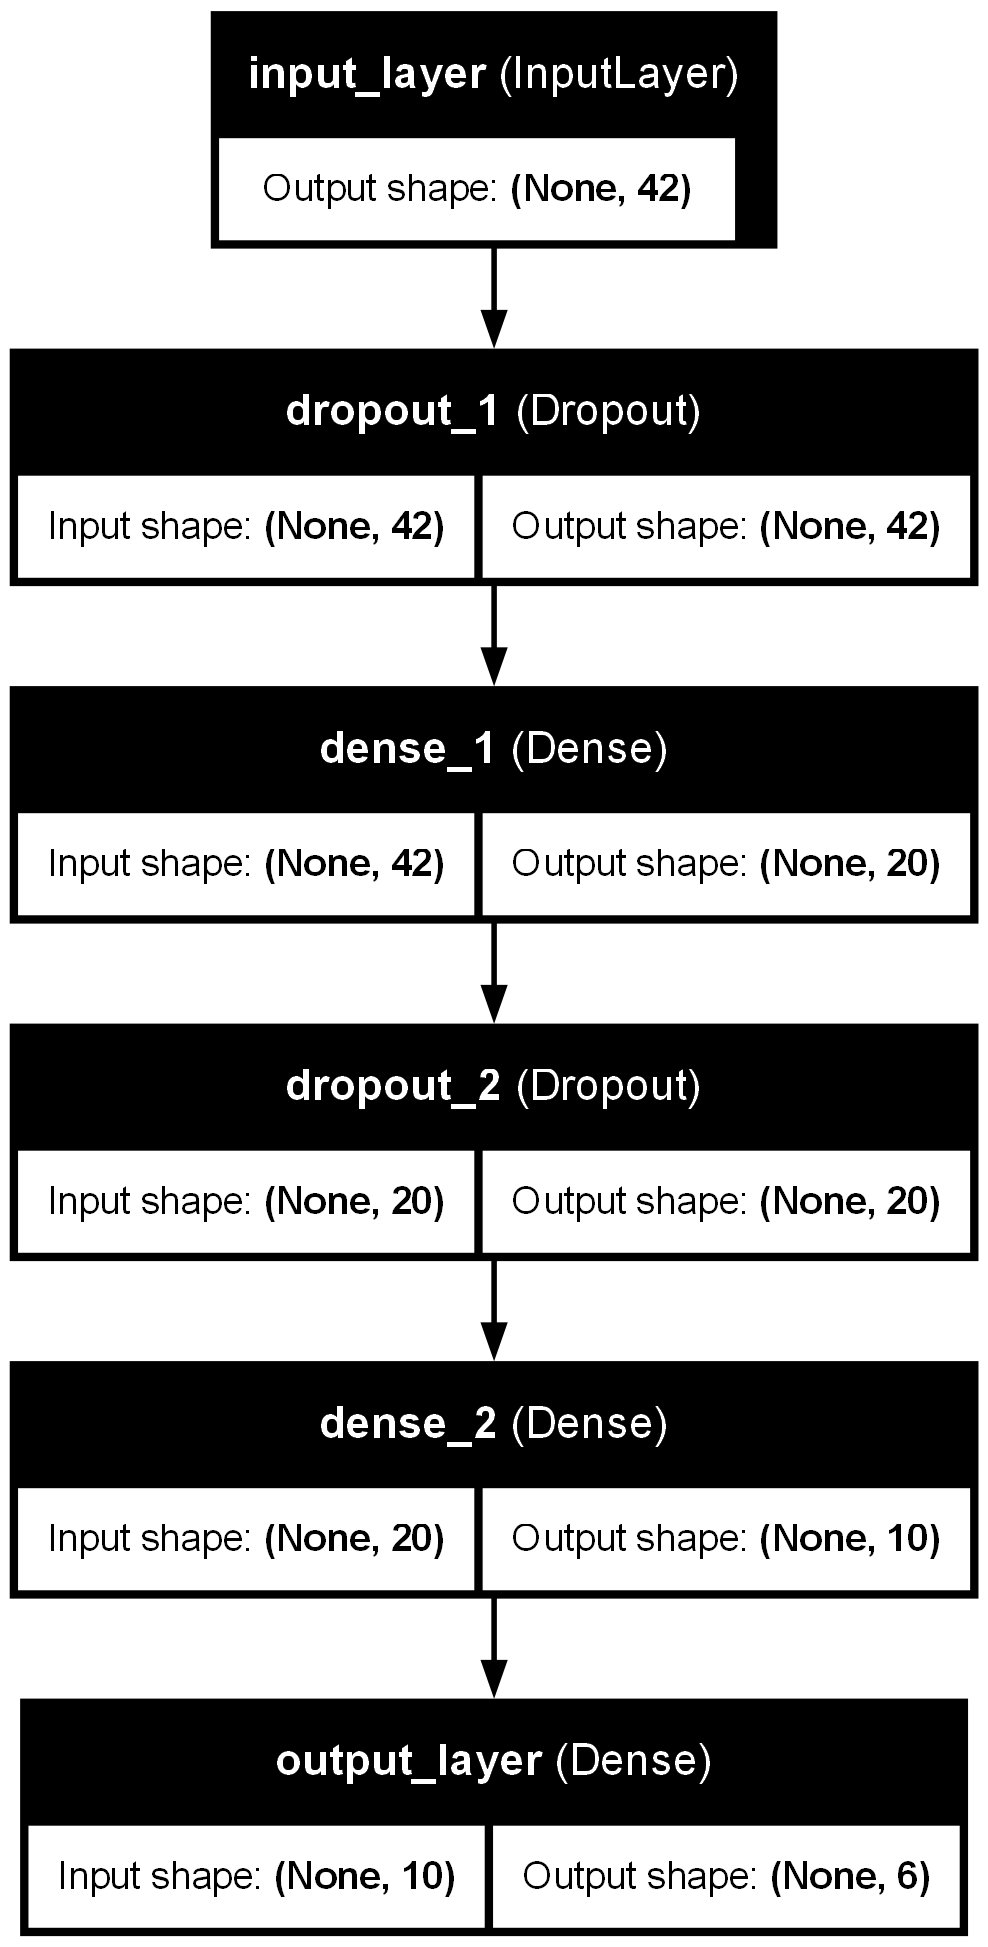

In [7]:
from keras.models import Model
from keras.layers import Input, Dropout, Dense
from keras.utils import plot_model

# Define the input layer
input_layer = Input((21 * 2,), name="input_layer")

# Add the layers
x = Dropout(0.2, name="dropout_1")(input_layer)
x = Dense(20, activation='relu', name="dense_1")(x)
x = Dropout(0.4, name="dropout_2")(x)
x = Dense(10, activation='relu', name="dense_2")(x)
output_layer = Dense(6, activation='softmax', name="output_layer")(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer, name="functional_model")

# Generate a plot of the model and save it
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
